# Úvod do pravděpodobnosti a statistiky
V tomto zápisníku si vyzkoušíme některé z konceptů, o kterých jsme dříve diskutovali. Mnoho konceptů z oblasti pravděpodobnosti a statistiky je dobře zastoupeno v hlavních knihovnách pro zpracování dat v Pythonu, jako jsou `numpy` a `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Náhodné proměnné a rozdělení
Začněme tím, že vygenerujeme vzorek 30 hodnot z rovnoměrného rozdělení od 0 do 9. Také spočítáme průměr a rozptyl.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Pro vizuální odhad, kolik různých hodnot je ve vzorku, můžeme vykreslit **histogram**:


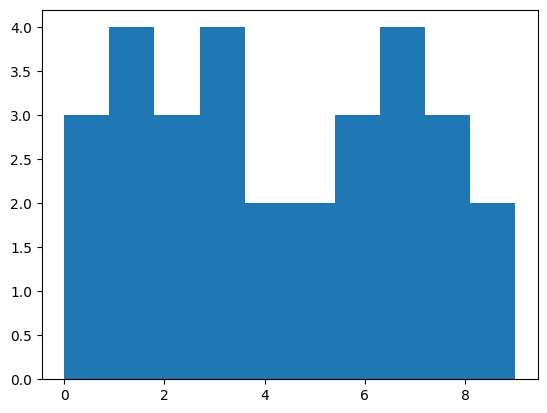

In [119]:
plt.hist(sample)
plt.show()

## Analýza reálných dat

Průměr a rozptyl jsou velmi důležité při analýze dat z reálného světa. Načtěme data o hráčích baseballu z [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


Používáme balíček [**Pandas**](https://pandas.pydata.org/) pro analýzu dat. O Pandas a práci s daty v Pythonu si povíme více později v tomto kurzu.

Pojďme vypočítat průměrné hodnoty pro věk, výšku a váhu:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Nyní se zaměřme na výšku a vypočítejme směrodatnou odchylku a rozptyl:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Kromě průměru má smysl podívat se na medián a kvartily. Ty lze zobrazit pomocí **box plotu**:


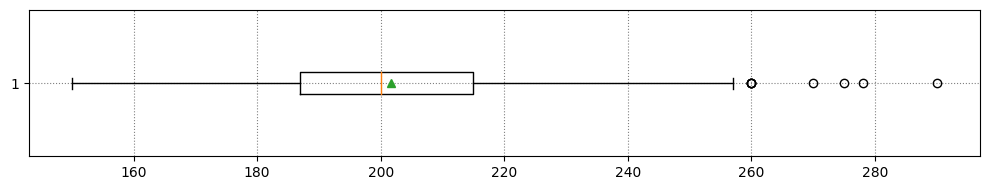

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Můžeme také vytvořit krabicové grafy podmnožin našeho datového souboru, například seskupené podle role hráče.


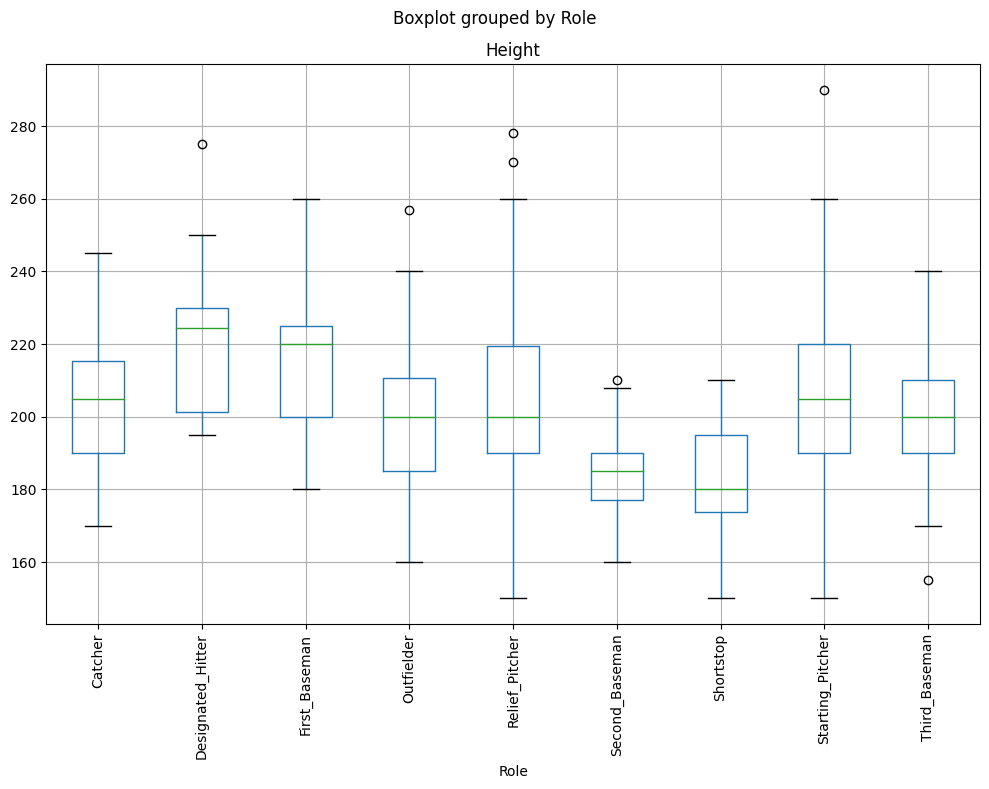

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Poznámka**: Tento diagram naznačuje, že průměrně jsou výšky hráčů na první metě vyšší než výšky hráčů na druhé metě. Později se naučíme, jak tuto hypotézu formálněji otestovat a jak ukázat, že naše data jsou statisticky významná, aby to potvrdila.

Věk, výška a váha jsou všechny spojité náhodné veličiny. Jak si myslíte, že vypadá jejich rozdělení? Dobrým způsobem, jak to zjistit, je vykreslit histogram hodnot:


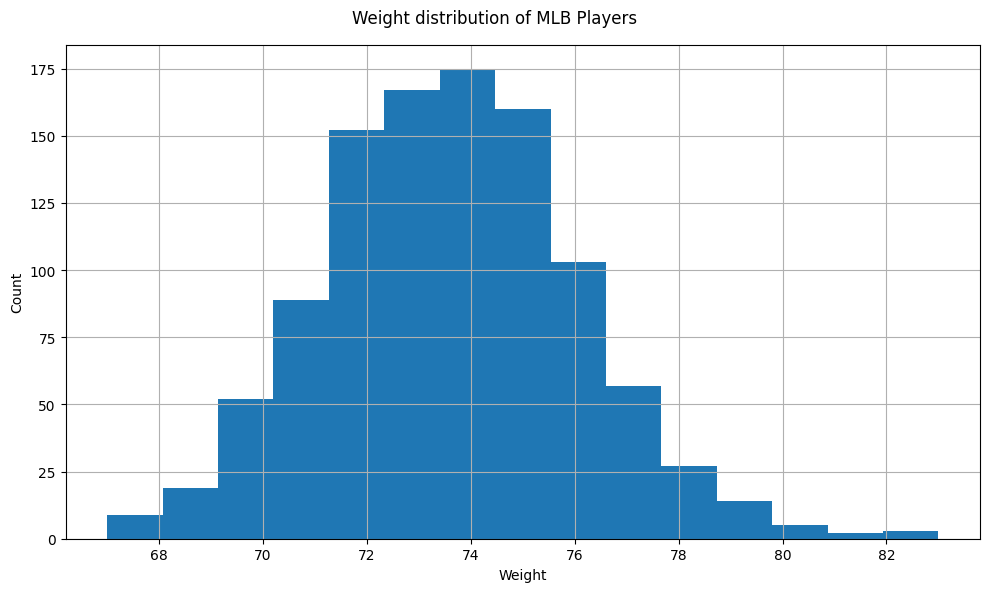

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Normální rozdělení

Vytvořme umělý vzorek hmotností, který sleduje normální rozdělení se stejným průměrem a rozptylem jako naše reálná data:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

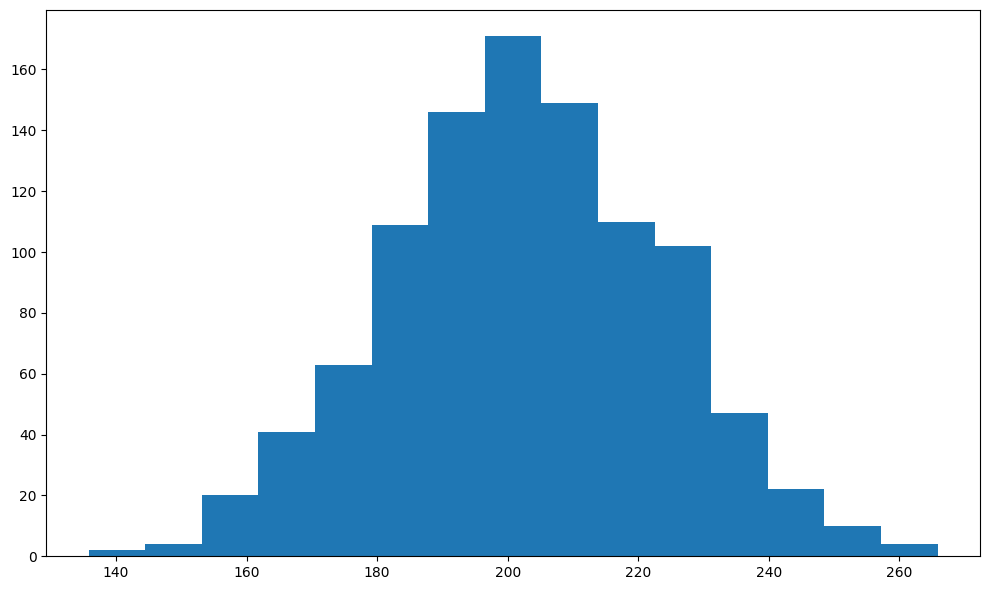

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

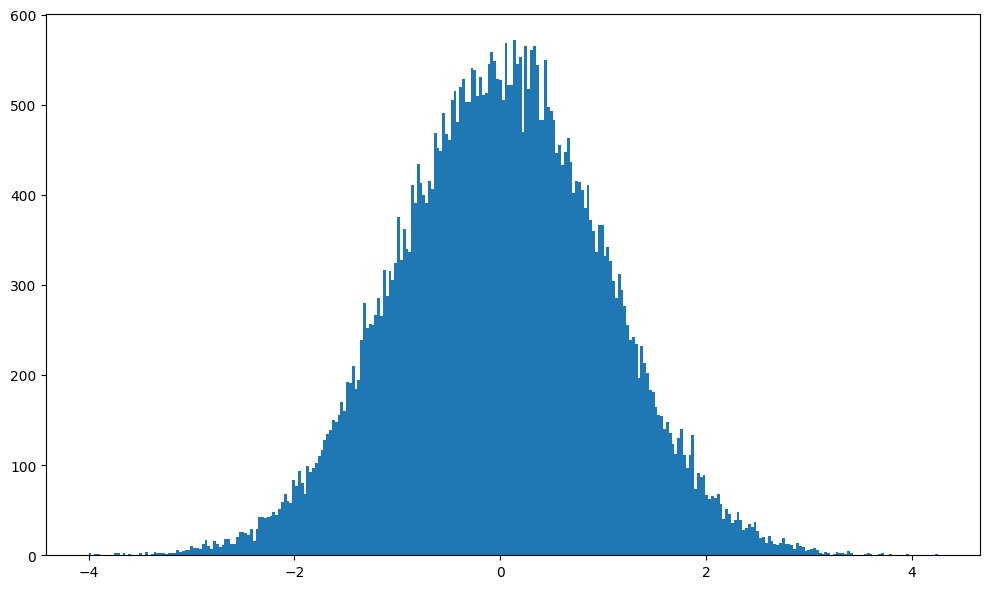

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Vzhledem k tomu, že většina hodnot v reálném životě má normální rozdělení, neměli bychom používat generátor náhodných čísel s rovnoměrným rozdělením k vytváření vzorových dat. Zde je, co se stane, pokud se pokusíme generovat hmotnosti s rovnoměrným rozdělením (vygenerované pomocí `np.random.rand`):


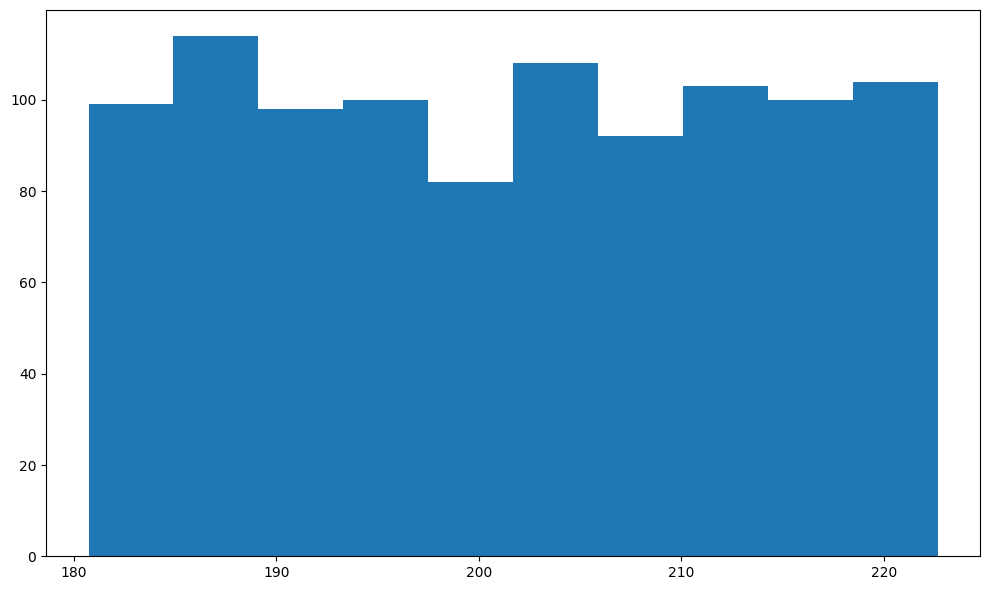

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Intervaly spolehlivosti

Nyní vypočítáme intervaly spolehlivosti pro váhy a výšky baseballových hráčů. Použijeme kód [z této diskuse na Stack Overflow](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Testování hypotéz

Pojďme prozkoumat různé role v naší datové sadě baseballových hráčů:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Vidíme, že intervaly se nepřekrývají.

Statisticky správnější způsob, jak ověřit hypotézu, je použít **Studentův t-test**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Dvě hodnoty vrácené funkcí `ttest_ind` jsou:
* p-hodnota může být považována za pravděpodobnost, že dvě distribuce mají stejný průměr. V našem případě je velmi nízká, což znamená, že existují silné důkazy podporující tvrzení, že první metaři jsou vyšší.
* t-hodnota je mezihodnota normalizovaného rozdílu průměrů, která se používá v t-testu a je porovnávána s prahovou hodnotou pro danou úroveň spolehlivosti.


## Simulace normálního rozdělení pomocí centrální limitní věty

Pseudonáhodný generátor v Pythonu je navržen tak, aby nám poskytoval rovnoměrné rozdělení. Pokud chceme vytvořit generátor pro normální rozdělení, můžeme využít centrální limitní větu. Pro získání hodnoty s normálním rozdělením jednoduše spočítáme průměr vzorku generovaného rovnoměrně.


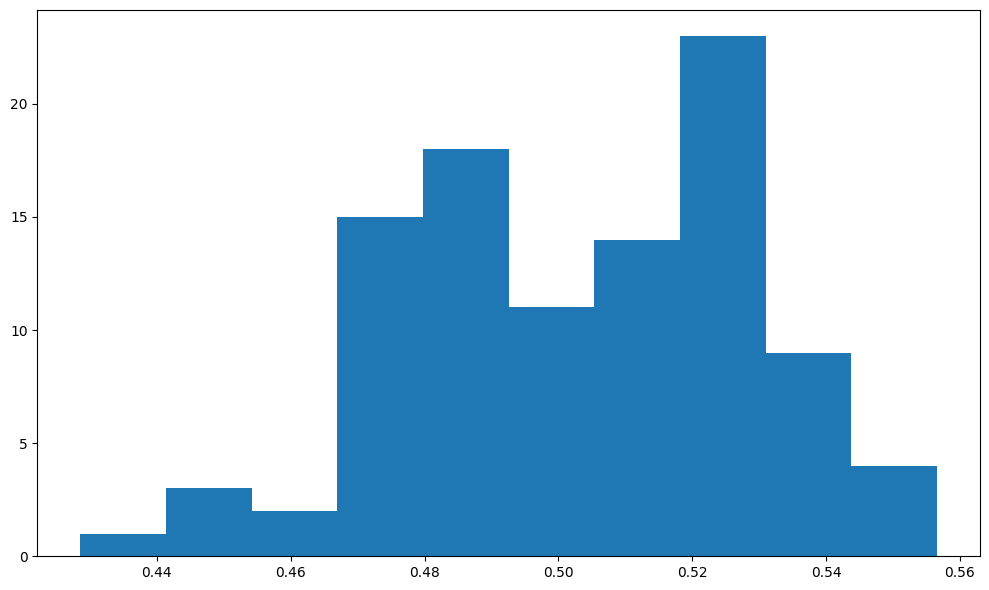

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Korelace a Zlá Baseballová Korporace

Korelace nám umožňuje najít vztahy mezi datovými sekvencemi. V našem jednoduchém příkladu si představme, že existuje zlá baseballová korporace, která platí svým hráčům podle jejich výšky – čím vyšší hráč, tím více peněz dostane. Předpokládejme, že základní plat je $1000 a k tomu bonus od $0 do $100, v závislosti na výšce. Vezmeme skutečné hráče z MLB a vypočítáme jejich imaginární platy:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Pojďme nyní vypočítat kovarianci a korelaci těchto sekvencí. `np.cov` nám poskytne takzvanou **kovarianční matici**, což je rozšíření kovariance na více proměnných. Prvek $M_{ij}$ kovarianční matice $M$ je korelace mezi vstupními proměnnými $X_i$ a $X_j$, a diagonální hodnoty $M_{ii}$ jsou rozptyly $X_{i}$. Podobně nám `np.corrcoef` poskytne **korelační matici**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


Korelace rovná 1 znamená, že mezi dvěma proměnnými existuje silný **lineární vztah**. Lineární vztah můžeme vizuálně vidět vykreslením jedné hodnoty proti druhé:


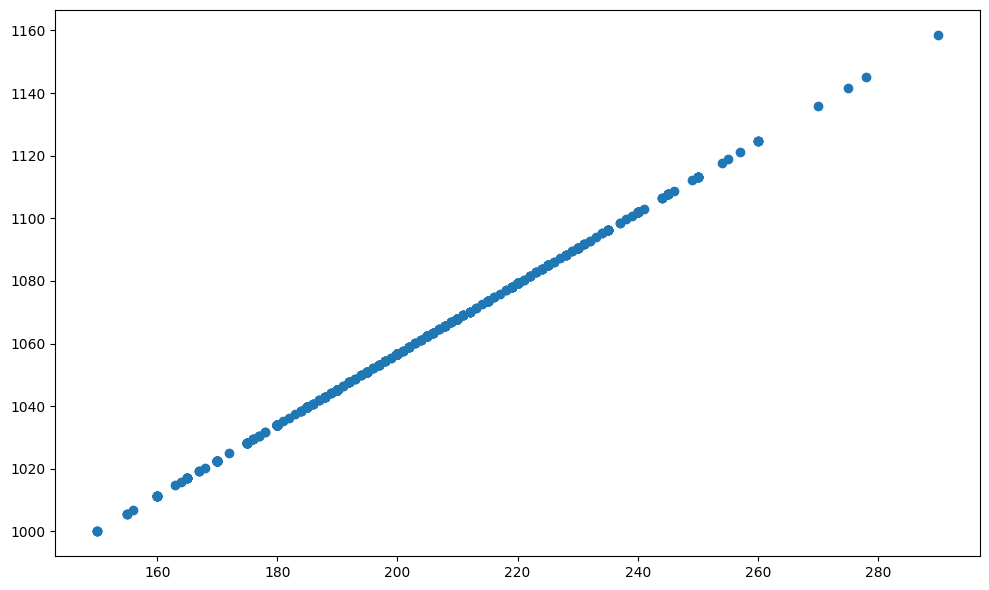

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Podívejme se, co se stane, pokud vztah není lineární. Předpokládejme, že naše společnost se rozhodla skrýt zjevnou lineární závislost mezi výškou a platy a zavedla do vzorce určitou nelinearitu, například `sin`:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


V tomto případě je korelace o něco menší, ale stále poměrně vysoká. Nyní, abychom vztah učinili ještě méně zřejmým, bychom mohli přidat trochu náhodnosti přidáním nějaké náhodné proměnné k platu. Podívejme se, co se stane:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


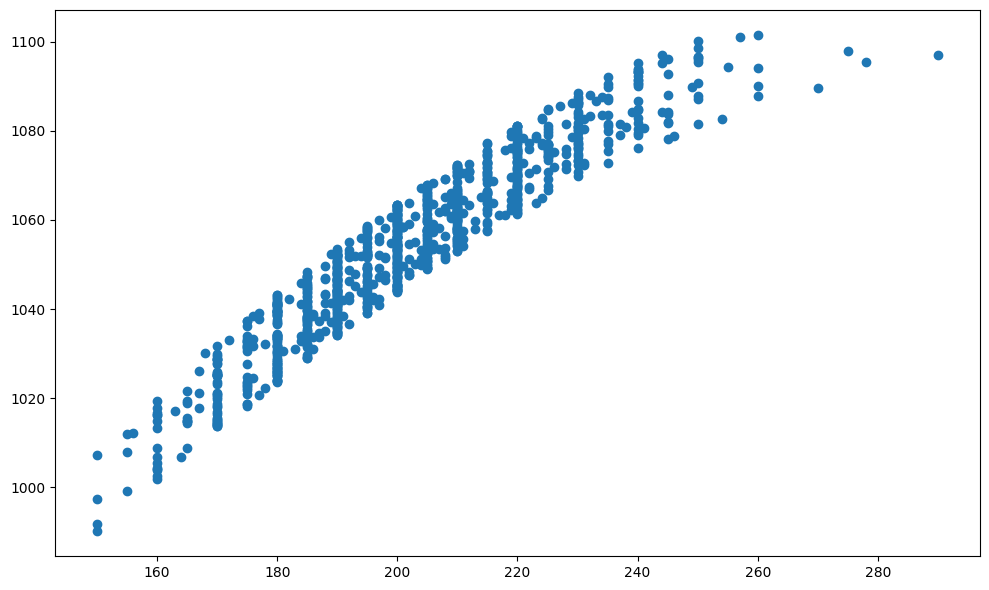

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Dokážete odhadnout, proč se tečky seřadí do vertikálních linií takto?

Pozorovali jsme korelaci mezi uměle vytvořeným konceptem, jako je plat, a pozorovanou proměnnou *výška*. Podívejme se také, zda dvě pozorované proměnné, jako výška a váha, spolu korelují:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Bohužel jsme nezískali žádné výsledky - pouze nějaké podivné hodnoty `nan`. To je způsobeno tím, že některé hodnoty v naší sérii jsou nedefinované, reprezentované jako `nan`, což způsobuje, že výsledek operace je také nedefinovaný. Při pohledu na matici vidíme, že problémový sloupec je `Weight`, protože korelace mezi hodnotami `Height` byla vypočítána.

> Tento příklad ukazuje důležitost **přípravy dat** a **čištění dat**. Bez správně připravených dat nemůžeme nic vypočítat.

Použijme metodu `fillna` k doplnění chybějících hodnot a vypočítejme korelaci:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

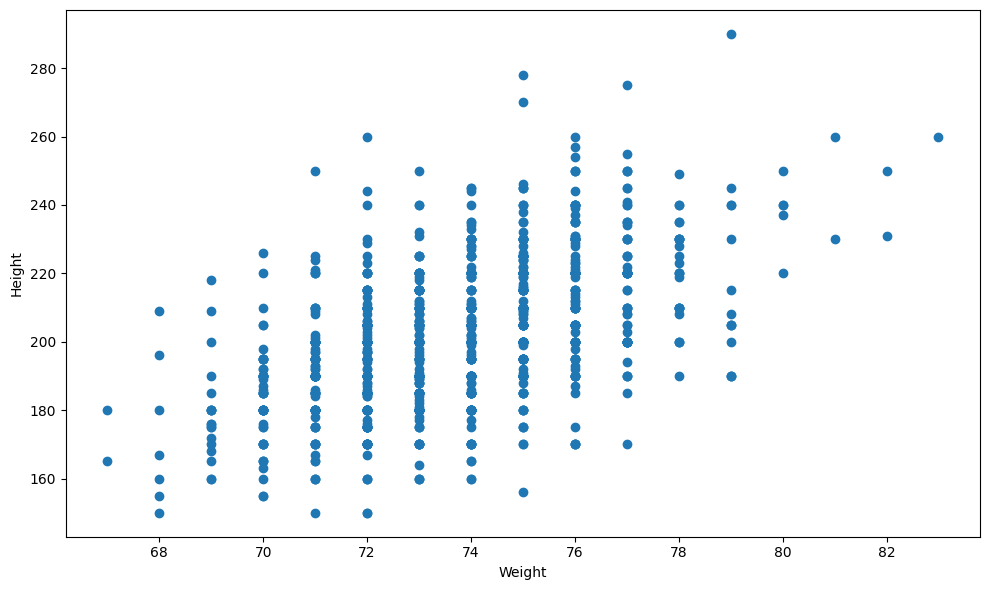

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Závěr

V tomto notebooku jsme se naučili, jak provádět základní operace s daty pro výpočet statistických funkcí. Nyní víme, jak používat solidní aparát matematiky a statistiky k ověření některých hypotéz a jak vypočítat intervaly spolehlivosti pro libovolné proměnné na základě vzorku dat.



---

**Prohlášení**:  
Tento dokument byl přeložen pomocí služby pro automatický překlad [Co-op Translator](https://github.com/Azure/co-op-translator). I když se snažíme o co největší přesnost, mějte prosím na paměti, že automatické překlady mohou obsahovat chyby nebo nepřesnosti. Za autoritativní zdroj by měl být považován původní dokument v jeho původním jazyce. Pro důležité informace doporučujeme profesionální lidský překlad. Neodpovídáme za žádná nedorozumění nebo nesprávné výklady vyplývající z použití tohoto překladu.
